In [83]:
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [85]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

18:35:07 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


18:35:07 - cmdstanpy - INFO - CmdStan done processing.
18:35:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: height_1_ppc_model_namespace::write_array: height is -61.439, but must be greater than or equal to 0.000000 (in 'C:/Users/rafal/Documents/height_1_ppc.stan', line 4, column 2 to column 44)
Consider re-running with show_console=True if the above output is unclear!


Text(0, 0.5, 'Number of people')

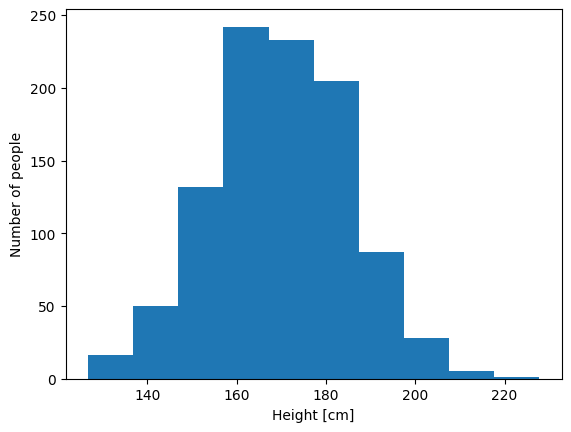

In [86]:
#histogram for mean from normal distribution
plt.hist(sim.mu)
plt.xlabel('Height [cm]')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

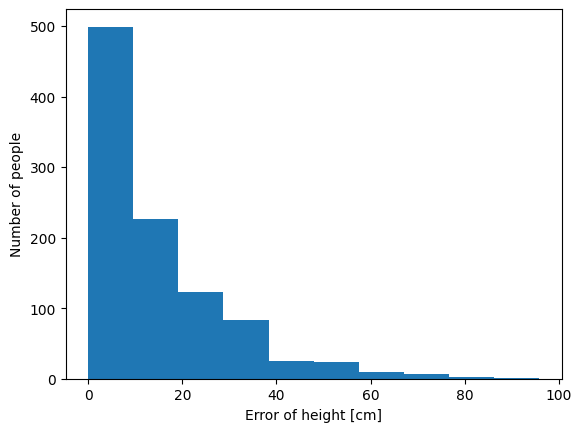

In [87]:
#histogram for sigma from normal distribution
plt.hist(sim.sigma)
plt.xlabel('Error of height [cm]')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

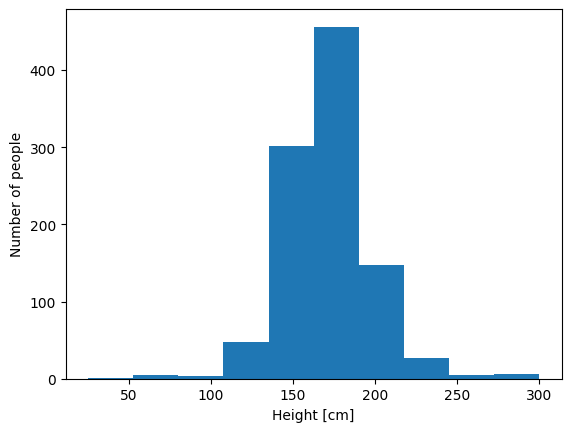

In [88]:

#histogram for height from normal distribution(mu,sigma)
plt.hist(sim.height)
plt.xlabel('Height [cm]')
plt.ylabel('Number of people')

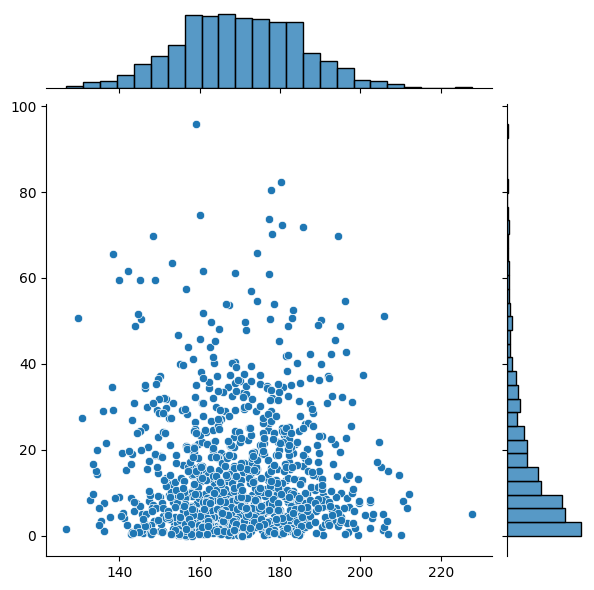

In [89]:
sns.jointplot(x=sim.mu.squeeze(),y=sim.sigma.squeeze())

In [90]:
#height_1_fit

model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

18:35:10 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                | 00:00 Status
chain 2 |                                                                                                | 00:00 Status

chain 3 |                                                                                                | 00:00 Status


chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 3 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 4 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


18:35:10 - cmdstanpy - INFO - CmdStan done processing.
18:35:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'C:/Users/rafal/Documents/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'C:/Users/rafal/Documents/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'C:/Users/rafal/Documents/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'C:/Users/rafal/Documents/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'C:/Users/rafal/Documents/height_1_fit.stan', line 14, column 2 to column 30)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'C:/Users/rafal/Documents/height_

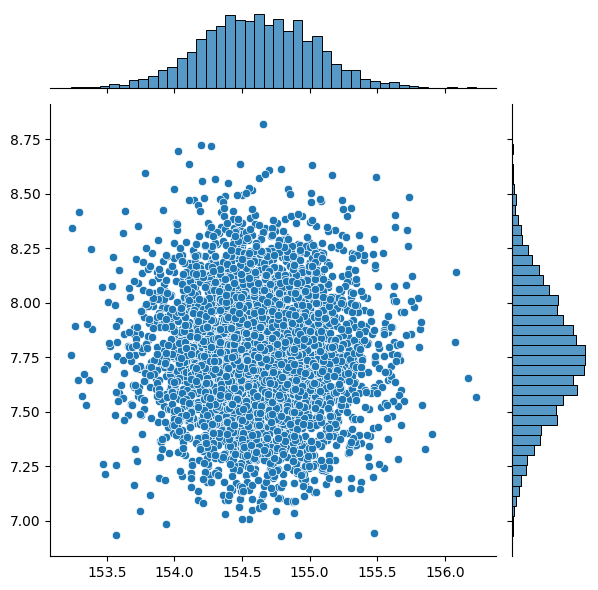

In [91]:
sns.jointplot(x=fit.mu.squeeze(),y=fit.sigma.squeeze())

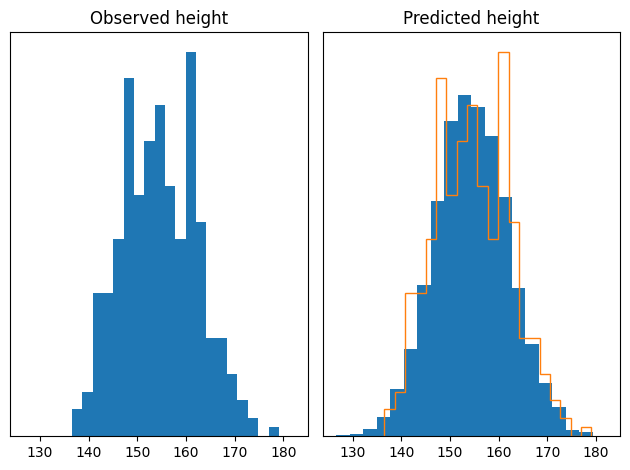

In [92]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)
ax1=axes[0]
ax1.hist(d.height, bins=20, density=True)
ax1.set_title('Observed height')
ax1.set_yticks(())
ax2=axes[1]
ax2.hist(fit.height, bins=20, density=True)
ax2.hist(d.height, bins=20, histtype='step',density=True)

ax2.set_title('Predicted height')
ax2.set_yticks(())
fig.tight_layout()

In [93]:
#As a basic prediction it is quite well, charactericts of predicted height agree with observed values

In [94]:
d['c_weight'] =  d['weight'] - d['weight'].mean();
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

In [95]:
#height_2a_ppc
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

18:35:14 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


18:35:14 - cmdstanpy - INFO - CmdStan done processing.


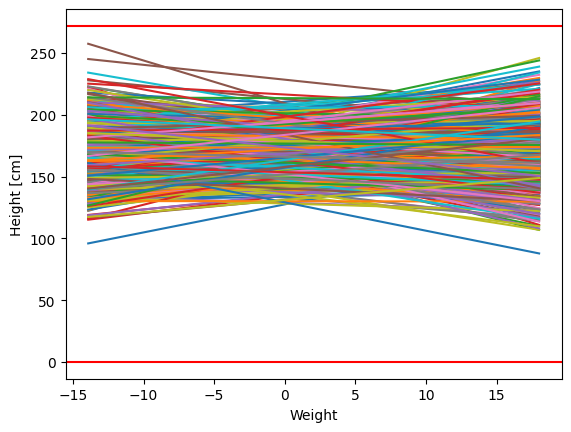

In [96]:
weight_param = np.linspace(d.c_weight.min(),d.c_weight.max());

for i in range(len(sim.alfaa)):
    y = sim.alfaa[i] + sim.betaa[i] * weight_param
    plt.plot(weight_param,y)

plt.ylabel('Height [cm]')
plt.xlabel('Weight')
plt.axhline(y=0, color='red')
plt.axhline(y=272, color='red')

In [97]:
#height_2b_ppc
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')
sim2b=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

18:35:15 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


18:35:15 - cmdstanpy - INFO - CmdStan done processing.


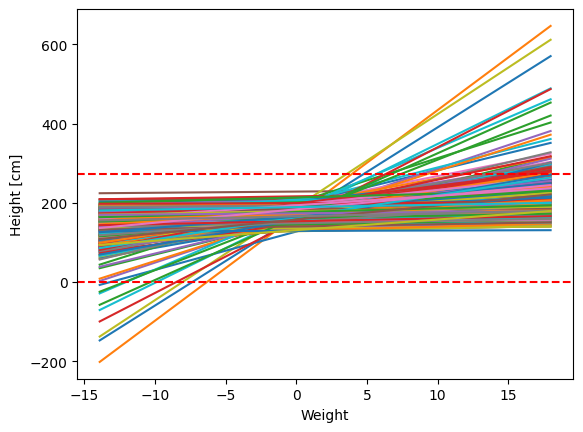

In [98]:
for i in range(len(sim.alfaa)):
   y = sim2b.alfaa[i] + sim2b.betaa[i] * weight_param
   plt.plot(weight_param,y)

plt.ylabel('Height [cm]')
plt.xlabel('Weight')

plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=272, linestyle='--', color='red')

In [99]:
quant = d['c_weight'].quantile([0,0.05, 0.25, 0.5, 0.75, 0.95,1])

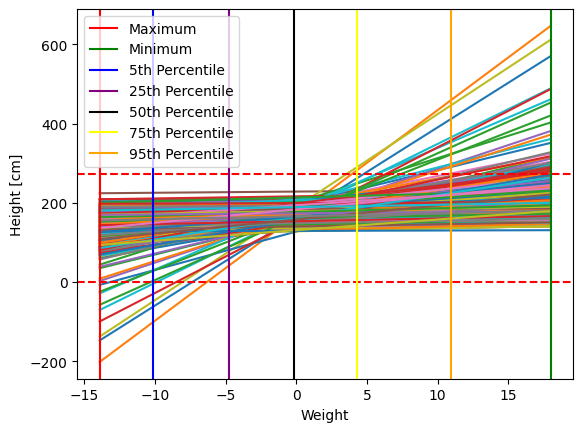

In [100]:
for i in range(len(sim.alfaa)):
   y = sim2b.alfaa[i] + sim2b.betaa[i] * weight_param
   plt.plot(weight_param,y)
    
plt.ylabel('Height [cm]')
plt.xlabel('Weight')

plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=272, linestyle='--', color='red')
plt.axvline(x=quant[0], color='red', label='Maximum')
plt.axvline(x=quant[1], color='green', label='Minimum')
plt.axvline(x=quant[0.05], color='blue', label='5th Percentile')
plt.axvline(x=quant[0.25], color='purple', label='25th Percentile')
plt.axvline(x=quant[0.5], color='black', label='50th Percentile')
plt.axvline(x=quant[0.75], color='yellow', label='75th Percentile')
plt.axvline(x=quant[0.95], color='orange', label='95th Percentile')
plt.legend()

In [106]:
N=50;
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')
data_fit = {'N':N, 'heights': d['height'][:N].values, 'weight':np.linspace(d['c_weight'][:N].min(),d['c_weight'][:N].max())};
fit=model_2_fit.sample(data=data_fit,seed=28052020)

18:38:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                | 00:00 Status
chain 2 |                                                                                                | 00:00 Status

chain 3 |                                                                                                | 00:00 Status


chain 1 |██████████████████████▉                                        | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 2 |████████████████████████████████████                         | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 3 |████████████████████████████████████                         | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |████████████████████████████████████████████████████████████████████████████████████| 00:0

18:38:16 - cmdstanpy - INFO - CmdStan done processing.
18:38:16 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/rafal/Documents/height_2_fit.stan', line 24, column 4 to column 42)
	Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/rafal/Documents/height_2_fit.stan', line 24, column 4 to column 42)
	Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/rafal/Documents/height_2_fit.stan', line 24, column 4 to column 42)
	Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/rafal/Documents/height_2_fit.stan', line 24, column 4 to column 42)
	Exception: normal_lpdf: Location parameter[1] is nan, but must be finite! (in 'C:/Users/rafal/Documents/height_2_fit.stan', line 24, column 4 to column 42)
	Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/rafal/

Text(0.5, 0, 'Weight')

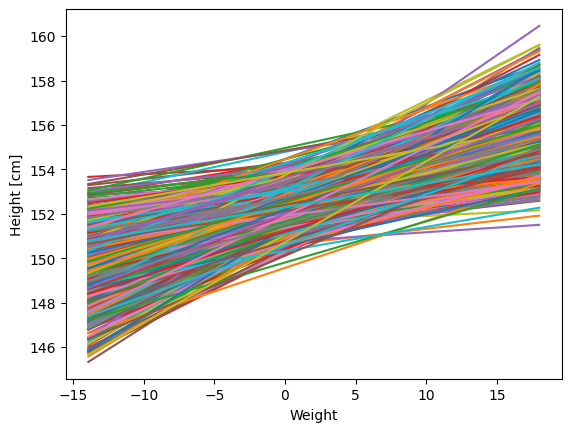

In [107]:
for i in range(len(sim.alfaa)):
   y = fit.alfaa[i] + fit.betaa[i] * weight_param
   plt.plot(weight_param,y)

plt.ylabel('Height [cm]')
plt.xlabel('Weight')

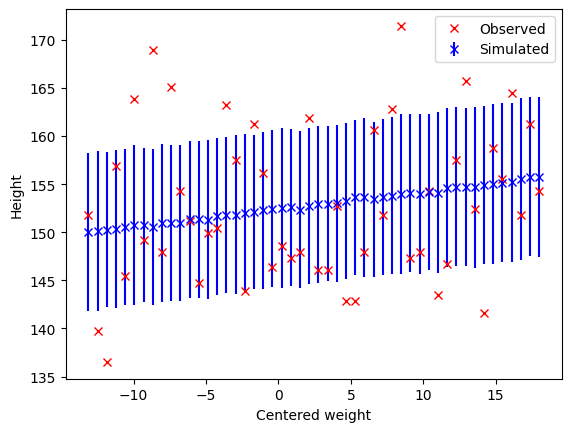

In [111]:
x=data_fit['weight']
heights_mean = np.mean(fit.height, axis=0)
heights_std = np.std(fit.height, axis=0)

plt.errorbar(x, heights_mean, yerr=heights_std, fmt='x', color='blue', label='Simulated')
plt.plot(x, data_fit['heights'], 'x', color='red', label='Observed')
plt.xlabel('Centered weight')
plt.ylabel('Height')
plt.legend()